In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import glob as glob
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [38]:
dengues = glob.glob("temp/*.csv")
# wrong_date_format = dengues[-1]
# dengues = dengues[:-1]

In [39]:
dengues

['temp/dhf46_160530010506.csv',
 'temp/dhf47_160530010514.csv',
 'temp/dhf48_160530010521.csv',
 'temp/dhf49_130826033129.csv',
 'temp/dhf50_130826033116.csv',
 'temp/dhf51_130826033101.csv',
 'temp/dhf52_130826033050.csv',
 'temp/dhf53_130826033033.csv',
 'temp/dhf54_130826033019.csv',
 'temp/dhf55_130826032932.csv',
 'temp/dhf56_160530010401.csv',
 'temp/dhf57_160530010439.csv',
 'temp/dhf58_160530010448.csv',
 'temp/dhf59_160530010458.csv',
 'temp/new_dhf59_170502095245.csv']

In [112]:
new = pd.read_csv(dengues[-1])
new = new.rename(columns={'martial_statue':'marital_status'})
len(new)

63931

In [113]:
old = pd.read_csv(dengues[-2])
len(old)

17614

In [114]:
col = ['gender', 'age_year', 'age_month', 'age_day',
       'marital_status', 'nationality', 'foreigner', 'career', 'address',
       'region', 'treatment_loca_type', 'patience_type', 'result',
       'hospital_arrival', 'treatment_start_date', 'death_date', 'virus', 'other_sickness']
new = new.drop(col,axis=1)
new.columns = ['โรค', 'รหัสจังหวัด', 'date']
new['รหัสจังหวัด'] = new['รหัสจังหวัด'].astype('str').str[:2]
new = new.sort_values(by='date')

In [115]:
len(new)

63931

In [116]:
old = old.drop(col,axis=1)
old.columns = ['โรค', 'รหัสจังหวัด', 'date']
old['รหัสจังหวัด'] = old['รหัสจังหวัด'].astype('str').str[:2]
old = old.sort_values(by='date')

In [117]:
len(old)

17614

In [118]:
import pickle
with open('/Users/JohnnyV/Desktop/Academic/CS/DataMining/project-trial/thailand.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [119]:
new = new[new['รหัสจังหวัด']!='na']
provinces = ([b.get(int(i)) for i in new['รหัสจังหวัด']])
new['จังหวัด'] = provinces

In [120]:
old = old[old['รหัสจังหวัด']!='na']
provinces = ([b.get(int(i)) for i in old['รหัสจังหวัด']])
old['จังหวัด'] = provinces

In [157]:
new[new['จังหวัด']=='Bangkok'].head(200)
# mm/dd/yyyy

,โรค,รหัสจังหวัด,date,จังหวัด
10884,26,10,1/10/2016,Bangkok
11508,26,10,1/10/2016,Bangkok
11739,26,10,1/10/2016,Bangkok
51714,66,10,1/10/2016,Bangkok
50170,66,10,1/10/2016,Bangkok
11164,26,10,1/10/2016,Bangkok
50579,66,10,1/10/2016,Bangkok
13577,26,10,1/10/2016,Bangkok
10810,26,10,1/10/2016,Bangkok
11481,26,10,1/10/2016,Bangkok


In [128]:
# len(old[old['จังหวัด']=='Bangkok']) + len(new[new['จังหวัด']=='Bangkok'])
len(old[old['จังหวัด']=='Bangkok'])

3554

In [155]:
# yyyy-mm-dd
old[old['จังหวัด']=='Bangkok']

,โรค,รหัสจังหวัด,date,จังหวัด
7211,66,10,2016-01-03,Bangkok
7212,66,10,2016-01-03,Bangkok
7213,66,10,2016-01-03,Bangkok
7214,66,10,2016-01-03,Bangkok
7215,66,10,2016-01-03,Bangkok
7216,66,10,2016-01-03,Bangkok
7217,66,10,2016-01-03,Bangkok
7218,66,10,2016-01-03,Bangkok
7219,66,10,2016-01-03,Bangkok
7220,66,10,2016-01-03,Bangkok


In [177]:
old_bkk = old[old['จังหวัด']=='Bangkok']
new_bkk = new[new['จังหวัด']=='Bangkok']

In [178]:
def clean_date_format(date):
    
    str_date = str(date)
    new_date = str_date.split('/')
    
    def clean_dm(dm):
        if len(dm) == 1:
            return '0'+ dm
        else:
            return dm
        
    return new_date[2] + "-" + clean_dm(new_date[0]) + "-" + clean_dm(new_date[1])

In [179]:
new_bkk['date'] = new_bkk.date.apply(clean_date_format)

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [199]:
new_bkk.date = pd.DatetimeIndex(new_bkk.date)
new_bkk.index = new_bkk.date
new_bkk = new_bkk.sort_values(by='date')
new_bkk_toplot = new_bkk.resample('W').size()

old_bkk.date = pd.DatetimeIndex(old_bkk.date)
old_bkk.index = old_bkk.date
old_bkk = old_bkk.sort_values(by='date')
old_bkk_toplot = old_bkk.resample('W').size()


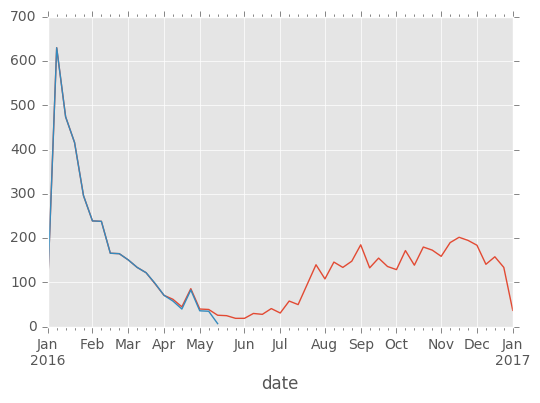

In [200]:
new_bkk_toplot.plot()
old_bkk_toplot.plot()